In [9]:
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings("ignore")

In [10]:
import os.path
def path_base(base_name):
    current_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
    print(current_dir)
    data_dir = current_dir.replace('notebook','data')
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [11]:
base = pd.read_csv(path_base('db_risco_credito.csv'))

C:\MyPhyton\DataScience\notebook
C:\MyPhyton\DataScience\data
C:\MyPhyton\DataScience\data\db_risco_credito.csv


In [12]:
base.head(3)

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado


In [5]:
base.describe()

,historia,divida,garantias,renda,risco
count,14,14,14,14,14
unique,4,2,2,3,3
top,desconhecida,alta,nenhuma,acima_35,alto
freq,5,7,11,7,6


In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
historia     14 non-null object
divida       14 non-null object
garantias    14 non-null object
renda        14 non-null object
risco        14 non-null object
dtypes: object(5)
memory usage: 688.0+ bytes


In [7]:
previsores = base.iloc[:,0:4].values
classe = base.iloc[:,4].values

In [8]:
print(previsores)
print(classe)

[['ruim' 'alta' 'nenhuma' '0_15']
 ['desconhecida' 'alta' 'nenhuma' '15_35']
 ['desconhecida' 'baixa' 'nenhuma' '15_35']
 ['desconhecida' 'baixa' 'nenhuma' 'acima_35']
 ['desconhecida' 'baixa' 'nenhuma' 'acima_35']
 ['desconhecida' 'baixa' 'adequada' 'acima_35']
 ['ruim' 'baixa' 'nenhuma' '0_15']
 ['ruim' 'baixa' 'adequada' 'acima_35']
 ['boa' 'baixa' 'nenhuma' 'acima_35']
 ['boa' 'alta' 'adequada' 'acima_35']
 ['boa' 'alta' 'nenhuma' '0_15']
 ['boa' 'alta' 'nenhuma' '15_35']
 ['boa ' 'alta' 'nenhuma' 'acima_35']
 ['ruim' 'alta' 'nenhuma' '15_35']]
['alto' 'alto' 'moderado' 'alto' 'baixo' 'baixo' 'alto' 'moderado' 'baixo'
 'baixo' 'alto' 'moderado' 'baixo' 'alto']


In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [9]:
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,1] = labelencoder.fit_transform(previsores[:,1])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])

In [10]:
print(previsores)

[[3 0 1 0]
 [2 0 1 1]
 [2 1 1 1]
 [2 1 1 2]
 [2 1 1 2]
 [2 1 0 2]
 [3 1 1 0]
 [3 1 0 2]
 [0 1 1 2]
 [0 0 0 2]
 [0 0 1 0]
 [0 0 1 1]
 [1 0 1 2]
 [3 0 1 1]]


In [11]:
from sklearn.tree import DecisionTreeClassifier
classificador = DecisionTreeClassifier(criterion='entropy')
classificador.fit(previsores, classe)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
# hist, dívida, garantias, renda
print(classificador.feature_importances_)

[0.48015651 0.06408636 0.03885431 0.41690281]


In [13]:
from sklearn.tree import export
export.export_graphviz(classificador,
                       out_file = 'arvore.dot',
                       feature_names = ['historia', 'divida', 'garantias', 'renda'],
                       class_names = ['alto', 'moderado', 'baixo'],
                       filled = True,
                       leaves_parallel=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


[Text(200.88000000000002, 199.32, 'X[3] <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]'),
 Text(133.92000000000002, 163.07999999999998, 'X[0] <= 2.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]'),
 Text(100.44000000000001, 126.83999999999999, 'X[1] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(66.96000000000001, 90.6, 'X[3] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(33.480000000000004, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(100.44000000000001, 54.359999999999985, 'X[0] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(66.96000000000001, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(133.92000000000002, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(133.92000000000002, 90.6, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(167.40000000000003, 126.83999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(267.

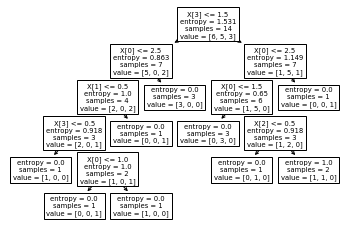

In [15]:
from sklearn import tree
tree.plot_tree(classificador) 

In [ ]:
# hist boa, dívida alta, garantias nenhuma, renda > 35
# hist ruim, dívida alta, garantias adequada, renda < 15

In [ ]:
resultado = classificador.predict([[0,0,1,2], [3, 0, 0, 0]])
resultado

In [ ]:
# Outras propriedades do Classificador
print(classificador.classes_)
